Author: Pang Chern Xi<br>
Date  : 25th August 2022<br> 

## In this project, we will use the Logistic Regression Model to predict whether a passenger survive in the Titanic incident.

Author: Pang Chern Xi
Date  : 25th August 2022 
You can obtain the dataset from this source: https://www.kaggle.com/competitions/titanic/data

In [1]:
# Upload the 3 datasets: train, test and gender_submission, separately.
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [4]:
import pandas as pd
train_data = pd.read_csv("train.csv")
test_features = pd.read_csv('test.csv')
test_labels = pd.read_csv('gender_submission.csv')

In [5]:
# Check whether the dataset contain empty slot(s).
print(train_data.isna().sum())
print(test_features.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
# Find the Passenger whose Fare is NaN
test_features[test_features.loc[:,"Fare"].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [7]:
# Drop the Passenger in test_data
test_labels = test_labels.drop(152,axis=0)

In [8]:
test_labels.shape

(417, 2)

In [9]:
#(a) Drop unwanted features
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
#(b) Drop missing values from 'Embarked'
train_data = train_data.dropna(subset=['Embarked'])
#(c) Do the same thing for test data
test_features = test_features.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test_features = test_features.dropna(subset=['Fare'])

In [10]:
# Trace the train_data
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [11]:
#(d) One hot encode the categorical features
train_data = pd.get_dummies(data=train_data)
test_features = pd.get_dummies(data=test_features)

In [12]:
# Trace the train_data now
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [13]:
#(e) Impute data to fill up the missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_data_imputed = imputer.fit_transform(train_data)
test_features_imputed = imputer.fit_transform(test_features)

In [14]:
#(f) extract out the training labels
train_features = train_data_imputed[:,1:]
train_labels = train_data_imputed[:,0]

In [15]:
# trace train_features
train_features

array([[ 3.       , 22.       ,  1.       , ...,  0.       ,  0.       ,
         1.       ],
       [ 1.       , 38.       ,  1.       , ...,  1.       ,  0.       ,
         0.       ],
       [ 3.       , 26.       ,  0.       , ...,  0.       ,  0.       ,
         1.       ],
       ...,
       [ 3.       , 29.6420927,  1.       , ...,  0.       ,  0.       ,
         1.       ],
       [ 1.       , 26.       ,  0.       , ...,  1.       ,  0.       ,
         0.       ],
       [ 3.       , 32.       ,  0.       , ...,  0.       ,  1.       ,
         0.       ]])

In [16]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'sex(female=1)')

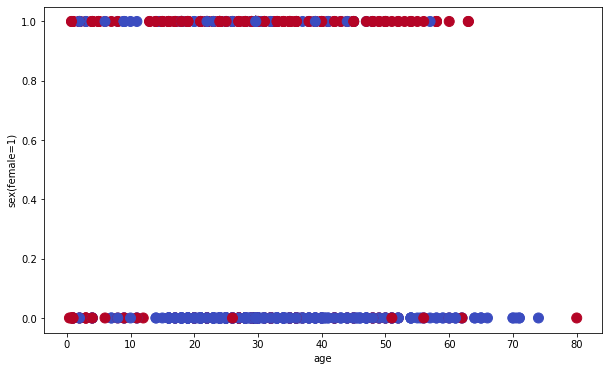

In [17]:
# Now we can make plot based on the class age and sex, you can see that the survival are certainly follow some patterns.
# male younger than 13 years old certainly has higher chance of survival than older male.
# female older than 10 years old clearly has certain advantages to survive.
# even by just plotting out this graph, we can already see a lot of information!
plt.figure(figsize=(10, 6))
plt.scatter(train_features[:, 1], train_features[:, 5],  c=train_labels, cmap=plt.cm.coolwarm, s=100)
plt.xlabel("age")
plt.ylabel("sex(female=1)")

In [18]:
# Now we apply the linear regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(train_features, train_labels)

LogisticRegression(solver='liblinear')

In [19]:
test_features_imputed.shape

(417, 10)

In [20]:
test_labels.shape

(417, 2)

In [21]:
real_labels = test_labels.iloc[:,1]

In [22]:
predictions=model.predict(test_features_imputed)

In [23]:
# See the result of logistic regression
# We can see how good is the performance of this model!
p = np.array(predictions).reshape(-1,1)
l = np.array(real_labels).reshape(-1,1)
a = np.hstack((p, l))
print(a)

[[0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 

In [24]:
from sklearn.metrics import classification_report
print(classification_report(real_labels, predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       265
           1       0.92      0.95      0.94       152

    accuracy                           0.95       417
   macro avg       0.95      0.95      0.95       417
weighted avg       0.95      0.95      0.95       417



In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(real_labels,predictions))

[[253  12]
 [  8 144]]


In [26]:
# If you don't believe the report you can calculate it by using your own code:
total_test = real_labels.shape[0]
total_match = 0
for index, value in enumerate(real_labels):
  if value == predictions[index]:
    total_match+=1
Accuracy = total_match / total_test
print(Accuracy)

0.9520383693045563


### This result is impressive, as by using a dense neural network, we usually just attain an accuracy about 82%, but now by using Logistic Regresssion, we make it to 95% !!
### What is more than that, we use a lesser time to train!
### This show the importance of choosing the right model.